#Assignment 1

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [148]:
data = pd.read_csv('/Mobiletrain.csv')

In [149]:
X = data.drop('price_range', axis=1).values
y = data['price_range'].values

In [150]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 categories for price range

In [154]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
50/50 [==============================] - 1s 10ms/step - loss: 1.3142 - accuracy: 0.3981 - val_loss: 1.1036 - val_accuracy: 0.6175
Epoch 2/10
50/50 [==============================] - 0s 5ms/step - loss: 0.9565 - accuracy: 0.6275 - val_loss: 0.7914 - val_accuracy: 0.7275
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.7775 - val_loss: 0.5709 - val_accuracy: 0.8225
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.8606 - val_loss: 0.4372 - val_accuracy: 0.8525
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.9087 - val_loss: 0.3389 - val_accuracy: 0.8850
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.9300 - val_loss: 0.2833 - val_accuracy: 0.9075
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.9456 - val_loss: 0.2450 - val_accuracy: 0.9250
Epoch 8/10
50/50 [=

In [155]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9275
Test Loss: 0.19409719109535217
Test Accuracy: 0.9275000095367432


# Assignment 2

In [156]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [157]:
X_train.shape

(60000, 28, 28)

In [158]:
y_train.shape

(60000,)

In [159]:
X_test.shape

(10000, 28, 28)

In [160]:
y_test.shape

(10000,)

In [161]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [162]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [163]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [164]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.6193 - accuracy: 0.7821 - val_loss: 0.4612 - val_accuracy: 0.8330
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4499 - accuracy: 0.8399 - val_loss: 0.4078 - val_accuracy: 0.8527
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4114 - accuracy: 0.8519 - val_loss: 0.3870 - val_accuracy: 0.8600
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3853 - accuracy: 0.8603 - val_loss: 0.3710 - val_accuracy: 0.8677
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3710 - accuracy: 0.8653 - val_loss: 0.3636 - val_accuracy: 0.8704
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3615 - accuracy: 0.8689 - val_loss: 0.3501 - val_accuracy: 0.8759
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3494 - accuracy: 0.8716 - val_loss: 0.3501 - val_accuracy: 0.8759
Epo

In [167]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.8778


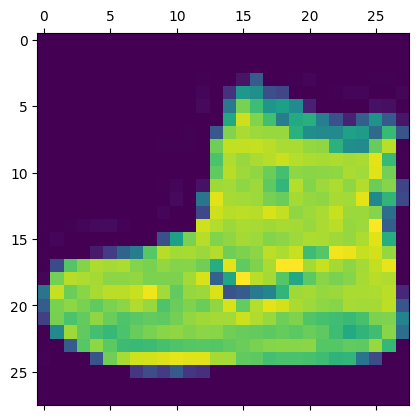

In [168]:
plt.matshow(X_train[0])

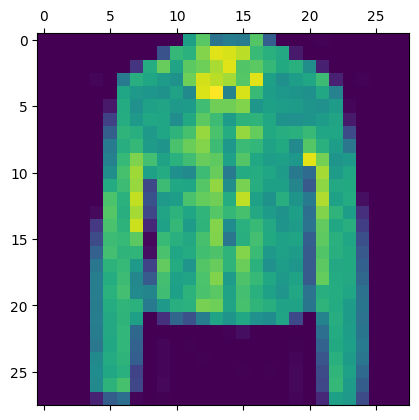

In [169]:
plt.matshow(X_test[10])

#Assignment 3

In [170]:
data = pd.read_csv("/content/penguins.csv")

In [171]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [172]:
data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [173]:
data.shape

(344, 9)

In [174]:
X = data.drop(columns=['species', 'island', 'sex'])
y = data[['species', 'island', 'sex']]

In [175]:
encoder = LabelEncoder()
y_encoded = y.apply(encoder.fit_transform)


In [176]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [178]:
model = keras.Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='softmax'),
    Dropout(0.2),
    Dense(3, activation='sigmoid')
])

In [182]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [183]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5745
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6291
Epoch 11/100
9/9 [==============================] - 0s 3ms/

In [184]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.5942


[nan, 0.5942028760910034]

#Assignment 4

In [185]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [134]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [135]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [136]:
X = data.drop(columns=['output'])
y = data['output']

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [139]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [140]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.6446
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7603
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8058
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.8140
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8388
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3712 - accuracy: 0.8512
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8636
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8719
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8760
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.8802


In [141]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


2/2 [==============================] - 0s 8ms/step - loss: 0.3394 - accuracy: 0.9016
Test Loss: 0.33937975764274597
Test Accuracy: 0.9016393423080444


In [142]:
model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


array([[0.0928397 ],
       [0.69503653],
       [0.72407115],
       [0.10550717],
       [0.8726717 ],
       [0.93411964],
       [0.71572053],
       [0.00301335],
       [0.01656983],
       [0.5588771 ],
       [0.9099993 ],
       [0.08689259],
       [0.8705129 ],
       [0.02360905],
       [0.9923862 ],
       [0.95410025],
       [0.9943362 ],
       [0.07030349],
       [0.01164023],
       [0.01364823],
       [0.61690146],
       [0.08153106],
       [0.13482647],
       [0.72552407],
       [0.9579347 ],
       [0.5523838 ],
       [0.88344723],
       [0.64712626],
       [0.06490869],
       [0.95353997],
       [0.05781733],
       [0.03472717],
       [0.0127605 ],
       [0.08351283],
       [0.6766335 ],
       [0.14668804],
       [0.610093  ],
       [0.74645305],
       [0.7092547 ],
       [0.85039634],
       [0.6686387 ],
       [0.7898517 ],
       [0.7775133 ],
       [0.8439035 ],
       [0.8302392 ],
       [0.03302127],
       [0.48577777],
       [0.866